# Algoritmos Genéticos
> O algoritmo completo se encontra no final do notebook, várias funções são criados no caminho.

### Gabriel Negreiros Lima

1. Implementar um algoritmo genético para resolver o problema de maximização da função Alpine 2

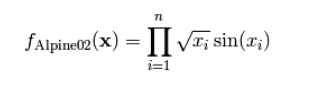

Nesta equação, n representa o número de dimensões e x_i pertencente a [0,10] para i = 1, ..., n. 

## Representação
Neste trabalho teremos n = 2, portanto:

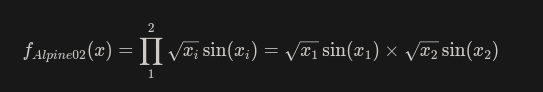

O Máximo Global da função é igual a `f(x^*)=2.808^n => f(x1,x2)=7.88`.

## Função *fitness*
A função de aptidão utilizada será `f_fit(x) = f(x) + 7.88`, que em módulo é o máximo e mínimo desta função, e desta forma não teremos resultados negativos na função *fitness*. Neste trabalho avaliaremos com 3 casas decimais.

In [2]:
import math
from random import randint
import numpy as np

def f_alpine02(x, y):
    return math.sqrt(x)*math.sin(x) * math.sqrt(y)*math.sin(y)

def f_fit(x, y):
    return f_alpine02(x, y) + 7.88

MAX_ALPINE = f_fit(7.917, 7.917) # 7.88 * 2
MAX_ALPINE

15.765600701977823

## População inicial

In [7]:
NUMBER_OF_INDIVIDUALS = 20
NUMBER_OF_PARENTS = int(NUMBER_OF_INDIVIDUALS/2)
X_POS = 0 
Y_POS = 1

x_s = [np.random.uniform(0,10) for _ in range(0,NUMBER_OF_INDIVIDUALS)]
y_s = [np.random.uniform(0,10) for _ in range(0,NUMBER_OF_INDIVIDUALS)]
population = np.zeros((NUMBER_OF_INDIVIDUALS,2))

for index, element in enumerate(x_s):
    x_s[index] = round(x_s[index], 3)
    y_s[index] = round(y_s[index], 3)
    fit = f_fit(x_s[index], y_s[index])
    
    population[index][0] = x_s[index]
    population[index][1] = y_s[index]

population

array([[ 7.301,  3.746],
       [ 2.499,  6.986],
       [ 7.321,  5.092],
       [ 2.358,  2.26 ],
       [ 8.073,  6.022],
       [ 3.543,  6.773],
       [ 0.452,  1.559],
       [ 6.761,  1.122],
       [ 2.587,  7.828],
       [ 8.734,  5.573],
       [ 0.818,  8.663],
       [ 3.062,  0.656],
       [ 8.436,  3.132],
       [ 2.26 ,  8.096],
       [ 1.907,  5.84 ],
       [ 4.592,  0.034],
       [ 4.328,  5.093],
       [10.   ,  7.619],
       [ 9.057,  4.569],
       [ 9.961,  2.778]])

## Seleção: roleta
Para fazer a seleção da roleta, iremos utilizar a função `f_fit` para gerar a roleta:

In [19]:
def roleta(population):
    sum_fitness = 0
    sum_by_individual = []
    temp = np.array([])                       # temporary to save the fitness
    number_of_rows, _ = population.shape      # population size
    fitnesses = np.zeros((number_of_rows,2))  # matrix with position and fitness of each one
    position = 0
    
    # saves all fitnesses and position of the individual
    for i in population:
        temp = f_fit(i[X_POS], i[Y_POS]) 
        fitnesses[position][0] = position
        fitnesses[position][1] = temp
        position += 1
        
    for fit in fitnesses:
        sum_fitness += fit[1]  
        sum_by_individual.append([
            fit[0],
            sum_fitness
        ])
        #print(fit[1], sum_fitness)
            
    sum_fitness = int(sum_fitness * 1000)  # make it a integer to ease
    rand_value = randint(0, sum_fitness)   # randomizing
    
    #print(sum_by_individual)
    rand_value = float(rand_value / 1000)   # make it back to float
    sum_fitness = float(sum_fitness / 1000)
    
    # find the first element that has fitness sum greater than random
    #print(f"sum_fitness_total: {sum_fitness}")
    #print(f"rand_value: {rand_value}")
    for ind_with_sum  in sum_by_individual:
        if ind_with_sum[1] >= rand_value: 
            #print(f"index of the individual and fitness sum: {ind_with_sum}")
            #print(f"individual: {population[int(ind_with_sum[0])]}")
            return population[int(ind_with_sum[0])]
        
        
roleta(population)

array([0.452, 1.559])

Agora que temos a função roleta, podemos selecionar os pais da próxima geração. Para uma população definida na variável NUMBER_OF_INDIVIDUALS, elegemos a metade de casais que serão os pais, e então estes serão passados para o cruzamento.

## Operadores Genéticos
### Crossover aritmético
Dados dois indivíduos, constituiremos um novo par de indivíduos

In [70]:
def crossover(parent_a, parent_b):
    
    a_x = -1
    a_y = -1
    b_x = -1
    b_y = -1
    
    while a_x < 0 or a_y < 0 or b_x < 0 or b_y < 0 or a_x > 10.0 or a_y > 10.0 or b_x > 10.0 or b_y > 10.0:
        alpha = randint(0,100)/100
        Pa_x = parent_a[0]
        Pa_y = parent_a[1]
        Pb_x = parent_b[0]
        Pb_y = parent_b[1]
        
        a_x = (alpha * Pa_x + (1 - alpha)* Pb_x)
        a_y = (alpha * Pa_y + (1 - alpha)* Pb_y)

        b_x = (alpha * Pb_x + (1 - alpha)* Pa_x)
        b_y = (alpha * Pb_y + (1 - alpha)* Pa_y)
    
    print(alpha)
    children_a = [a_x, a_y]
    children_b = [b_x, b_y]
    
    return (children_a, children_b)

children_a, children_b = crossover(population[0], population[1])
print(children_a, children_b)

0.47
[4.2427439952, 5.5624378432] [4.4389440048, 5.425010156800001]


### Mutação Gaussiana
Dado um indivíduo, realizar uma mudança local com um ajuste aleatório em ambas as posições:

In [71]:
def mutation(population): 
    
    new_pop = np.copy(population)
    probability = 1   # 0.1% 
    decisor =  randint(1, 1000)
    
    if decisor <= probability:
        
        signal = randint(0, 1) 
        delta = randint(0, 1000)/1000
        if signal == 0:
            signal = -1
    
        for index, individual in enumerate(new_pop):
            new_pop[index][0] = individual[0] + (delta * signal)
            new_pop[index][1] = individual[1] + (delta * signal)
            
            while new_pop[index][0] < 0 or new_pop[index][0] > 10.0 or new_pop[index][1] < 0 or new_pop[index][1] > 10:
                signal = randint(0, 1) 
                delta = randint(0, 1000)/1000
                
                if signal == 0:
                    signal = -1
                    
                new_pop[index][0] = individual[0] + (delta * signal)
                new_pop[index][1] = individual[1] + (delta * signal)
   
    return new_pop

mutated = mutation(population)
print(population, "\n", mutated)

[[5.97584408 4.34849328]
 [2.70584392 6.63895472]
 [1.926      0.92      ]
 [9.81       6.67      ]
 [1.926      0.92      ]
 [1.926      0.92      ]
 [8.5168     6.57605   ]
 [3.2332     6.87495   ]
 [8.653082   5.873692  ]
 [5.1221     3.6106    ]
 [3.13834371 2.13645338]
 [2.97303069 2.01360782]
 [3.53699056 2.05828724]
 [4.11804013 2.10432058]
 [5.97584408 4.34849328]
 [1.683      0.995     ]
 [1.40929    3.22372   ]
 [3.06171    7.10428   ]
 [2.08014    1.32988   ]
 [8.75786    4.25812   ]
 [0.535      0.363     ]
 [1.119      2.542     ]
 [9.649      6.512     ]
 [4.682      2.149     ]
 [2.48       3.908     ]
 [9.058      3.388     ]
 [3.352      7.786     ]
 [5.66       5.397     ]
 [2.929      6.567     ]
 [1.683      0.995     ]
 [2.101      6.939     ]
 [6.819      3.38      ]
 [7.062      1.241     ]
 [4.718      7.067     ]
 [2.012      1.3       ]
 [0.289      4.839     ]
 [9.81       6.67      ]
 [1.926      0.92      ]
 [8.826      4.288     ]
 [6.879      9.262     ]]

## Mais algumas funções auxiliares
### Fitnesses para plots
Dada uma população, precisaremos do maior fitness, do menor, e do fitness médio para criar o gráfico de convergência.

In [6]:
def max_fitness(population):
    biggest = 0
    
    for individual in population:
        fit = f_fit(individual[0], individual[1])
        
        if fit >= biggest: 
            chosen_x = individual[0]
            chosen_y = individual[1]
            biggest = fit
    
    return ([chosen_x, chosen_y], biggest)

max_fitness(population)

([8.451, 8.024], 14.592059130105179)

In [7]:
def mean_fitness(population):
    sum_value = 0.0
    
    for individual in population:
        fit = f_fit(individual[0], individual[1])
        sum_value = sum_value + fit
        
    return sum_value / NUMBER_OF_INDIVIDUALS
    
mean_fitness(population)

9.33320080465603

In [8]:
def min_fitness(population):
    minor = 10.0
    
    for individual in population:
        fit = f_fit(individual[0], individual[1])
        
        if fit <= minor:
            chosen_x = individual[0]
            chosen_y = individual[1]
            minor = fit
    
    return ([chosen_x, chosen_y], minor)

min_fitness(population)

([7.555, 9.676], 5.848868950231564)

## Algoritmo completo
Agora com as funções necessárias, montamos o algoritmo.

0.29
0.27
0.45
0.63
0.96
0.14
0.71
0.86
0.2
0.57
0.46
0.98
0.33
0.84
0.91
0.25
0.13
0.43
0.83
0.88
0.18
0.69
0.17
0.75
0.7
0.86
0.99
0.92
0.76
0.27
0.87
0.13
0.31
0.21
0.81
0.74
0.97
0.74
0.47
1.0
0.25
0.27
0.29
0.38
0.62
0.24
0.46
0.99
0.73
0.29
0.05
0.73
0.03
0.02
0.62
0.88
0.64
0.54
0.9
0.44
0.03
0.85
0.13
0.26
0.0
0.01
0.08
0.46
0.28
0.61
0.93
0.24
0.42
0.85
0.47
0.53
0.32
0.36
0.29
0.5
0.47
0.14
0.99
0.06
0.48
0.7
0.94
0.8
0.53
0.64
0.53
0.04
0.65
0.96
0.45
0.96
0.4
0.85
0.17
0.46
0.56
0.86
0.01
0.62
0.14
0.62
0.8
0.57
0.6
0.22
0.42
0.91
0.76
0.74
0.26
0.15
0.44
0.25
0.25
0.64
0.3
0.61
0.45
0.94
0.98
0.26
0.89
0.42
0.33
0.05
0.43
0.65
0.83
0.78
0.14
0.91
0.27
0.05
0.8
0.52
0.89
0.2
0.52
0.57
0.29
0.87
0.16
0.33
0.75
0.75
0.14
0.35
0.64
0.03
0.49
0.11
0.07
0.48
0.56
0.39
0.96
0.44
0.12
0.47
0.48
0.63
0.57
0.72
0.01
0.33
0.02
0.64
0.19
0.82
0.91
0.5
0.64
0.25
0.5
0.86
0.38
0.92
0.1
0.14
0.31
0.1
0.91
0.38
0.51
0.85
0.35
0.5
0.48
0.98
0.98
0.12
0.36
0.91
0.52
0.7
0.6
0.95
0.28
0.35
0

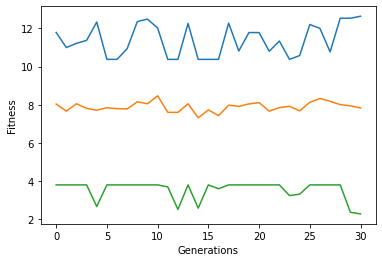

In [73]:
from matplotlib import pyplot as plt

max_gens = 30
actual_gen = 0 
difference = 10000
current_pop = population
new_gen = population
vector_best = []
vector_mean = []
vector_worst = []
vector_gen = []
crossover_ratio = 0.7

while actual_gen <= max_gens and difference > 0.01:
    
    # Choose the best individual
    best_ind, best_fit = max_fitness(current_pop)
    vector_best.append(best_fit)
    
    mean_fit = mean_fitness(current_pop)
    vector_mean.append(mean_fit)
    
    worst_ind, worst_fit = min_fitness(current_pop)
    vector_worst.append(worst_fit)
    
    vector_gen.append(actual_gen) 
    counter = 0 
    
    for index in range(0, NUMBER_OF_PARENTS, 2):
        # selection
        parent_a = roleta(current_pop)
        parent_b = roleta(current_pop)
        #print(parent_a, parent_b, "\n-----")
        
        cross_rand = randint(0,100)/100
        if cross_rand <= 0.7:
            # crossover
            children_a, children_b = crossover(parent_a, parent_b)
            #print(f"parent_a: {parent_a}, parent_b: {parent_b}")
            #print(f"children_a: {children_a}, parent_b: {children_b}", "\n")

            # mutation (0.1%)
            #children_a = mutation(children_a)
            #children_b = mutation(children_b)

            new_gen[index] = children_a
            new_gen[index+1] = children_b

            #print(f"C_a: {children_a}, C_a: {children_b}")
        else:
            new_gen[index] = parent_a
            new_gen[index+1] = parent_b
    
    current_pop = new_gen
    difference = abs(best_fit - f_fit(7.917, 7.917))
    #print(f"melhor individuo: {best_ind}, fitness: {best_fit},\nfitness otimo: {f_fit(7.917, 7.917)}, geracao atual: {actual_gen}\n\n")
    actual_gen = actual_gen + 1

    
plt.plot(vector_gen, vector_best, label='best')
plt.plot(vector_gen, vector_mean, label='mean')
plt.plot(vector_gen, vector_worst, label='worst')
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.show()

# ToDo
- Plotar gráfico de convergência
  - Fitness do melhor
  - Fitness médio da população
  - Fitness do pior elemento